In [1]:
import numpy as np
from scipy.integrate import quad, trapezoid
import matplotlib.pyplot as plt

# Constants and parameters
q = 1.6e-19  # Electron charge in Coulombs
ND0 = np.logspace(14, 18, num=50)  # ND0 values spanning 10^14 to 10^18
d = 5e-4  # Thickness in cm
NDB = 1e14

# Function to compute integrand for resistance
def Rintg(x, ND0_i):
    #NDB = 1e13  # Background doping concentration
    ND = NDB + ND0_i * np.exp(-5 * x)  # Doping profile
    
    # Mobility calculation (empirical model)
    munmin = 92
    mun0 = 1268
    NDref = 1.3e17
    an = 0.91
    mun = munmin + mun0 / (1 + (ND / NDref) ** an)  # Mobility model
    
    # Resistivity integrand (since R = ∫ (1 / qμND) dx)
    return q * mun * ND

# Calculate resistance for ND0 = 1e14 specifically
ND0_specific = 1e14
integral_specific, _ = quad(Rintg, 0, 1, args=(ND0_specific,))
R_specific = 1/( integral_specific * d)
print(f'Resistance for ND0 ={NDB:.2e}: {R_specific:.4e} Ohm')

integral_specific2, _ = quad(Rintg, 0, d, args=(ND0_specific,))
R_specific2 = 1/integral_specific2
print(f'Resistance2 for ND0 ={NDB:.2e}: {R_specific2:.4e} Ohm')

x_vals = np.linspace(0, 1, 100)  # Discretize x for trapezoidal integration
y_vals = np.array([Rintg(x, ND0_specific) for x in x_vals])  # Evaluate function
integral_trapz = trapezoid(y_vals, x_vals)  # Compute integral
R_trapz = 1/(integral_trapz * d)  # Compute resistance
print(f'R_trapz for ND0 ={NDB:.2e}: {R_trapz:.4e} Ohm')

x_vals2 = np.linspace(0, d, 100)  # Discretize x for trapezoidal integration
y_vals2 = np.array([Rintg(x, ND0_specific) for x in x_vals2])  # Evaluate function
integral_trapz2 = trapezoid(y_vals2, x_vals2)  # Compute integral
R_trapz2 = 1/ integral_trapz2 # Compute resistance
print(f'R_trapz2 for ND0 ={NDB:.2e}: {R_trapz2:.4e} Ohm')


Resistance for ND0 =1.00e+14: 7.6807e+04 Ohm
Resistance2 for ND0 =1.00e+14: 4.6103e+04 Ohm
R_trapz for ND0 =1.00e+14: 7.6805e+04 Ohm
R_trapz2 for ND0 =1.00e+14: 4.6103e+04 Ohm


Resistance for ND0 = 1e14: 7.6807e+04 Ohm
Resistance2 for ND0 = 1e14: 4.6103e+04 Ohm
R_trapz for ND0 = 1e14: 7.6805e+04 Ohm
R_trapz2 for ND0 = 1e14: 4.6103e+04 Ohm


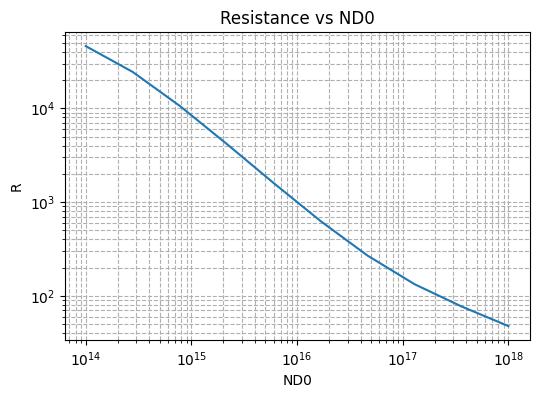

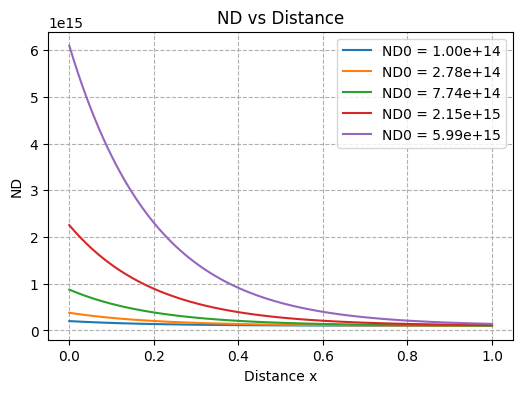

In [2]:
import numpy as np
from scipy.integrate import quad, trapezoid
import matplotlib.pyplot as plt

# Constants and resistor parameters
q = 1.6e-19
ND0 = np.logspace(14, 18,10)
NDB=1e14
d = 5e-4

# Resistance calculation
def Rintg(x, ND0_i):
    #NDB = 2e14
    ND = NDB + ND0_i * np.exp(-5 * x)
    
    # Mobility calculation
    munmin = 92
    mun0 = 1268
    NDref = 1.3e17
    an = 0.91
    mun = munmin + mun0 / (1 + (ND / NDref) ** an)
    
    # Integrand
    return mun * ND

R = []
for ND0_i in ND0:
    integral, _ = quad(Rintg, 0, d, args=(ND0_i,))
    R.append(1 / (q * 1 * integral))

# quad 
ND0_specific = NDB
integral_specific, _ = quad(Rintg, 0, 1, args=(ND0_specific,))
R_specific = 1 / (q * d * integral_specific)
print(f'Resistance for ND0 = 1e14: {R_specific:.4e} Ohm')

integral_specific2, _ = quad(Rintg, 0, d, args=(ND0_specific,))
R_specific2 = 1 / (q * 1 * integral_specific2)
print(f'Resistance2 for ND0 = 1e14: {R_specific2:.4e} Ohm')

# trapzoid
x_vals = np.linspace(0, 1, 100)  # Discretize x for trapezoidal integration
y_vals = np.array([Rintg(x, ND0_specific) for x in x_vals])  # Evaluate function
integral_trapz = trapezoid(y_vals, x_vals)  # Compute integral
R_trapz = 1/(q*d*integral_trapz) # Compute resistance
print(f'R_trapz for ND0 = 1e14: {R_trapz:.4e} Ohm')

x_vals2 = np.linspace(0, d, 100)  # Discretize x for trapezoidal integration
y_vals2 = np.array([Rintg(x, ND0_specific) for x in x_vals2])  # Evaluate function
integral_trapz2 = trapezoid(y_vals2, x_vals2)  # Compute integral
R_trapz2 = 1/(q*1*integral_trapz2) # Compute resistance
print(f'R_trapz2 for ND0 = 1e14: {R_trapz2:.4e} Ohm')

# Plotting resistance result
plt.figure(figsize=(6, 4))
plt.loglog(ND0, R)
plt.grid(True, which="both", linestyle="--")
plt.xlabel('ND0')
plt.ylabel('R')
plt.title('Resistance vs ND0')
plt.show()

# Plot ND as a function of distance x
x_values = np.linspace(0, 1, 100)
ND_plots = {ND0_i: [NDB + ND0_i * np.exp(-5 * x) for x in x_values] for ND0_i in ND0[:5]}  # Plot for first 5 ND0 values

plt.figure(figsize=(6, 4))
for ND0_i, ND_values in ND_plots.items():
    plt.plot(x_values, ND_values, label=f'ND0 = {ND0_i:.2e}')

plt.grid(True, which="both", linestyle="--")
plt.xlabel('Distance x')
plt.ylabel('ND')
plt.title('ND vs Distance')
plt.legend()
plt.show()


In [4]:
# sympy: integrate(function,(x,start,end))
# scipy: quad(function,start,end)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return x**2
 
result = quad(f, 0, 1) ## 적분 결과(적분값, 오차)
print(result)
print('적분값 :', result[0])
print('오차 :', result[1])

(0.33333333333333337, 3.700743415417189e-15)
적분값 : 0.33333333333333337
오차 : 3.700743415417189e-15


In [5]:
def g(x):
    return np.exp(-x)
 
result = quad(g, 0, np.inf)
 
print('적분값 :', result[0])
print('오차 :', result[1])

적분값 : 1.0000000000000002
오차 : 5.842606703608969e-11


I(a,b)=int(f,0,4), f=ax^2+bx+1
위 적분은 a,b에 따라 달라진다. 즉 적분인자 x 외에 다른 부분 인자가 있는 경우인데 이러한 적분을 하기 위해선 args(인자)를 사용해야 한다. 다만 부분인자는 적분하고자 할 함수에서 두번째 인자부터 차례대로 정의해 주어야 한다.
아래 코드는 I(3,2)를 계산한다.

$$y=\int_0^4 ax^2+bx+1 dx $$


In [6]:
# scipy: quad(function,start,end,args(1st,2nd))

def integrand(x, a, b): ## a, b는 x 다음에 정의해야한다.
    return a*x**2+b*x+1
 
result = quad(integrand, 0, 4, args=(3, 2))
print('적분값 :', result[0])
print('오차 :', result[1])

적분값 : 84.00000000000001
오차 : 9.325873406851317e-13


### 다중적분
quad를 반복사용하면 이중 적분 그리고 더 나아가 다중 적분도 가능하다. 여기서는 아래의 적분값을 계산해보는 방법을 알아보자.

$$\int_0^\infty \int_1^\infty \frac{e^{-xt}}{t^3}dtdx$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def integrand(t, n, x): ## 적분 함수
    return np.exp(-x*t) / t**n
 
def internel_integrand(n, x): ## 안쪽 적분 계산
    res = quad(integrand, 1, np.inf, args=(n, x))
    return res[0] ## res 첫번째 원소가 적분값
 
result = quad(lambda x: internel_integrand(3, x), 0, np.inf)
print('적분값 :', result[0])
print('오차 :', result[1])

적분값 : 0.33333333325010883
오차 : 2.8604069920115143e-09


### 이중적분(Dobule integral) 계산하기 with dblquad
dblquad를 사용하면 이중 적분 계산도 쉽게 할 수 있다. 사실 quad로 할 수 있으나 다변수 함수에 대한 적분은 dblquad로 하는 것이 더 빠르다고 한다.
dblquad는 적분하고자 할 함수와 바깥 적분 구간 시작과 끝, 안쪽 적분 구간 시작과 끝을 인자로 받는다.\
아래코드는
$$\int_0^{0.5} \int_0^{1-2y}xydxdy$$
를 계산한다.

In [9]:
from scipy.integrate import dblquad
def f(x, y):
    return x*y
 
result = dblquad(f, 0, 0.5, 0, lambda y: 1-2*y)
 
print('적분값 :', result[0])
print('오차 :', result[1])

적분값 : 0.010416666666666668
오차 : 4.101620128472366e-16


### 삼중적분(triple integral) 계산하기 with tplquad
$$\int_0^3 \int_0^2 \int_0^1 (xy+z)dxdydz$$

In [10]:
from scipy.integrate import tplquad
def f(x, y, z):
    return x*y+z
 
result = tplquad(f, 0, 3, 0, 2, 0, 1)
 
print('적분값 :', result[0])
print('오차 :', result[1])

적분값 : 12.0
오차 : 1.3322676295501878e-13


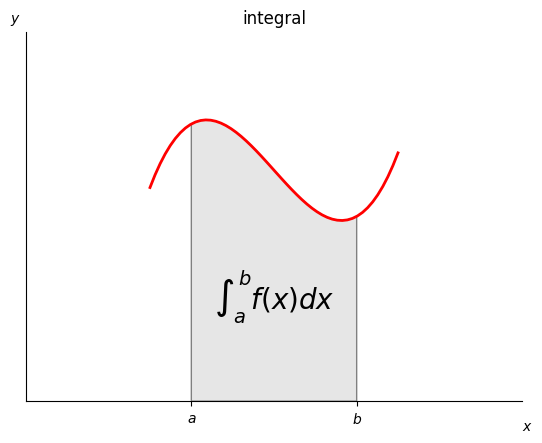

In [4]:
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("integral")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
plt.show()